In [ ]:
# pip uninstall pandas

Found existing installation: pandas 2.3.3
Uninstalling pandas-2.3.3:
  Would remove:
    /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas-2.3.3.dist-info/*
    /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/*
Proceed (Y/n)? ^C
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LinearRegression

In [6]:
import os
import certifi
os.environ['REQUESTS_CA_BUNDLE'] = certifi.where()
os.environ['SSL_CERT_FILE'] = certifi.where()

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/refs/heads/master/data/Advertising.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)>

In [ ]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


# <font color = '#3B9797'> Data Analysis

> Check null values in data, if null values are present, then try this-
> - First identify which columns have more null values
> - If any column have more than 15% of data missing then drop the entire column (why?)
> - Then check if we can drop the null values by rows (if we have less data then replace the null values)
> - If we have more data points then we can simply drop all the null values by rows

In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

> Identify if the features are co-related to the target by visualisation

In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(f'Loading the feature matrix with shape: {X.shape} and target vector with shape : {y.shape}')

Loading the feature matrix with shape: (200, 3) and target vector with shape : (200,)


>- first check if we have outliers in features
>- The nature of the data (distribution - histogram)
>- Co-relation of the feature with the target 
>- for co-relation (if both distributions are gaussian then use Pearson's co relation)
>- for co-relation (if both distributions are not gaussian then Spearman's co relation)
>- Co relation testing comes under statistical testing 
>- Statistical testing is of two types - parametric (Gaussian) and non parametric (Non Gaussian)
>- Pearson's is parametric & Spearman's is non parametric test

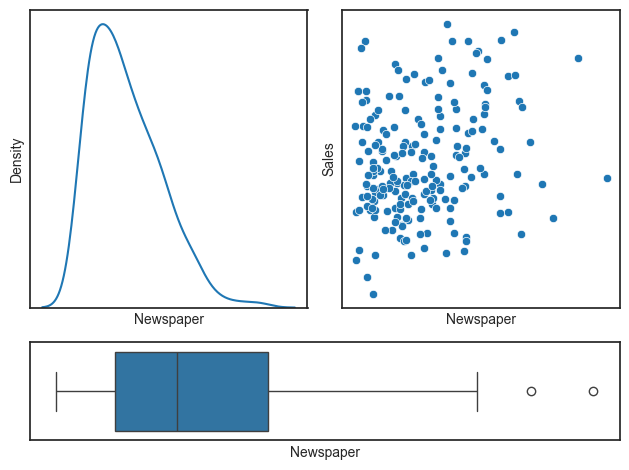

In [10]:
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('seaborn-v0_8-white')

col = 'Newspaper'

fig = plt.figure(layout="constrained")
gs = GridSpec(7, 4, figure=fig)
ax1 = fig.add_subplot(gs[:5, :2])
ax2 = fig.add_subplot(gs[:5, 2:])
ax3 = fig.add_subplot(gs[5:, :])

sns.kdeplot(X[col], ax = ax1)
ax1.set_yticks([])
ax1.set_xticks([])

sns.scatterplot(x = X[col], y = y, ax = ax2)
ax2.set_yticks([])
ax2.set_xticks([])

sns.boxplot(x = X[col], ax = ax3)
ax3.set_yticks([])
ax3.set_xticks([])

plt.tight_layout()

In [ ]:
X.values